# Google Play Store Insights: Unveiling App Dynamics

- Conducted comprehensive data cleaning and transformation of Google Play Store app data using Python
- Refining data types and optimizing columns for analysis. 
- Leveraged Python for in-depth data analysis, uncovering insights in app categories, installations, and user engagement. 
- Produced informative visualizations and conducted detailed analysis to derive actionable insights from dataset.

# Data Analysis Proccess

I am going to follow the steps of data analysis
- Understanding the problem
- Collecting the data
- Cleaning the data
- Analyzing the data
- Interpreting the results

## 1. Understanding the problem
A developer wants to make & publish an app on google app store. He wants to get some insignts about the already published apps on the play store and he wants us to recommend a category which has low competition. I'll be getting answers to the follwoing questions in order to provide him with usefull insights.
- Does paid apps get more installations or free apps.
- Which category of apps has more installations for both paid & free.
- Does app size effects the number of installations.
- What is average size of most installed apps in each category
- Does size has any realtionship with reviews.
- Does free apps or paid apps get more reviews.
- Which category got more indtallations but least amount of published apps.

## 2. Collecting Data
I'll be using Google Play store app data set from Kaggle.
Dataset Link: https://www.kaggle.com/datasets/lava18/google-play-store-apps

## 3. Cleaning the Data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt

In [2]:
# Ignoring Warnings

warnings.filterwarnings('ignore')

In [3]:
apps_data = pd.read_csv('googleplaystore.csv')

In [4]:
# Make a copy of the data

apps_data2 = apps_data

In [5]:
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


---
#### Observation
- Reviews & Rating columns are int & float
- But size, price & installations columns should be numeric as well. So, we need to make them numeric.
---

### A. Cleaning the Size Coulmn

In [7]:
# Unique values in the size column

apps_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
#### Observation
*Size column has following unique values*
- Values with 'M'
- Values with 'K'
- Values with 'Varies with device'
---

In [8]:
# We will chnage the values in MBs, Kbs and varies with device to MBs by writing a function and then applying that function
# to the dataset.

# Writing a function to convert Size column into Megabytes (MB)

def convert_size(Size):
    if 'M' in Size:
        return float(Size.replace('M', ''))
    elif 'k' in Size:
        return '{:.2f}'.format(float(Size.replace('k', '')) / 1024, 2)
    elif 'Varies with device' in Size:
        return np.nan
    return Size


In [9]:
apps_data['Size'] = apps_data['Size'].astype(str)
apps_data['Size'] = apps_data['Size'].apply(convert_size)

In [10]:
# Changing datatype to 'float'
apps_data['Size'] = apps_data['Size'].astype(float)

### B. Cleaning the Installs Column

In [11]:
# Unique values in Installs column

apps_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [12]:
# Checking the null values

apps_data['Installs'].isnull().sum()

0

In [13]:
apps_data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

---
#### Observation
*Install column has following things*
- There are no null values
- Values has '+' and ',' in it
- Data type is object instead of int

We need to remove the '+' & ',' and then we need to convert
the data type to 'int'
---

In [14]:
# Removing '+ & ,' from the column

apps_data['Installs'] = apps_data['Installs'].str.replace('+','').str.replace(',', '')

In [15]:
# Changing the data type of the column

apps_data['Installs'] = apps_data['Installs'].astype(int)

### C. Cleaning the Price Column

In [16]:
apps_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
apps_data['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [18]:
apps_data['Price'].isnull().sum()

0

---
#### Observation
*Price column has following things*
- There are no null values
- Values has'$' in it
- Data type is object instead of float

We need to remove the '$' and then we need to 
convert the data type to 'float'
---

In [19]:
# Removing the '$' from the column

apps_data['Price'] = apps_data['Price'].str.replace('$', '')

In [20]:
# Converting the data type to 'float'

apps_data['Price'] = apps_data['Price'].astype(float)

## 4. Analyzing Data

- Does paid apps get more installations or free apps.
- Which category of apps has more installations for both paid & free.
- Does app size effects the number of installations.
- What is average size of apps in each category
- Apps instalation and Reviews relationship
- Does size has any realtionship with reviews.
- Which category got more indtallations but least amount of published apps.

In [21]:
apps_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


### 1. Does Paid apps get more Installations or free Apps.

In [22]:
# 1. Does paid apps get more installations or free apps.

install_apps = apps_data.groupby('Type')['Installs'].sum().reset_index()
install_apps

,Type,Installs
0,Free,167560477406
1,Paid,72956081


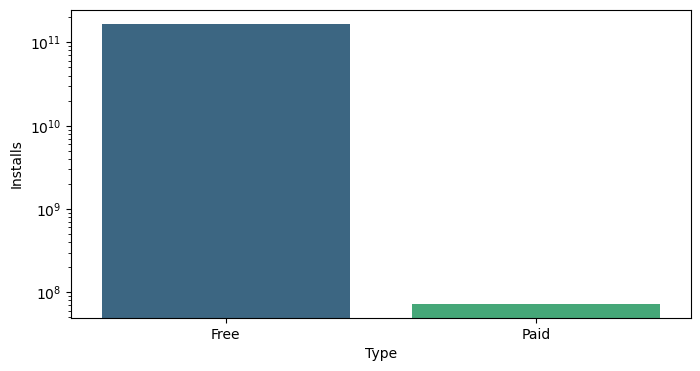

In [23]:
plt.figure(figsize=(8,4))
sns.barplot(x='Type', y='Installs', data=install_apps, palette='viridis')
plt.yscale('log')
plt.show()

### 2. Which Category of Apps has more Installations.

In [24]:
# 2. Which category of apps has more installations.

install_by_category = apps_data['Category'].value_counts().sort_values(ascending = False).reset_index().head(10)
install_by_category

,index,Category
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


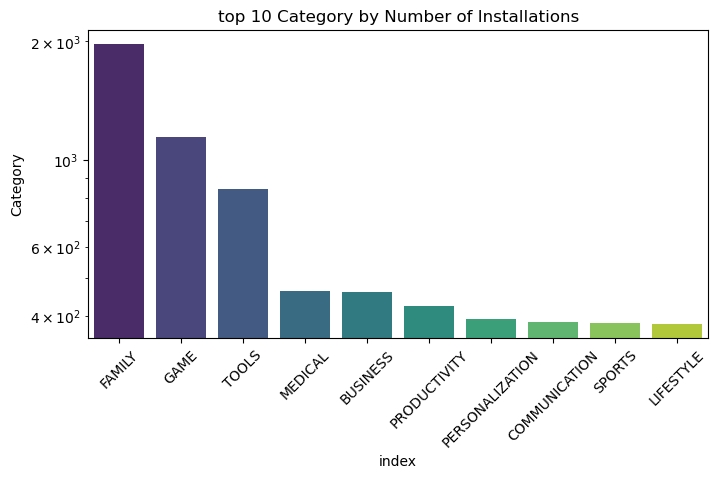

In [25]:
plt.figure(figsize=(8,4))
sns.barplot(x='index', y='Category',data=install_by_category, palette='viridis')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('top 10 Category by Number of Installations')
plt.show()

In [26]:
# 2. Which category of apps has more installations for paid Apps.

paid_apps = apps_data[apps_data['Type'] == 'Paid']
paid_apps_installs = paid_apps.groupby('Category')['Type'].value_counts().sort_values(ascending=False).reset_index(name='count').head(10)
paid_apps_installs

,Category,Type,count
0,FAMILY,Paid,191
1,MEDICAL,Paid,109
2,GAME,Paid,83
3,PERSONALIZATION,Paid,83
4,TOOLS,Paid,78
5,BOOKS_AND_REFERENCE,Paid,28
6,PRODUCTIVITY,Paid,28
7,COMMUNICATION,Paid,27
8,SPORTS,Paid,24
9,PHOTOGRAPHY,Paid,22


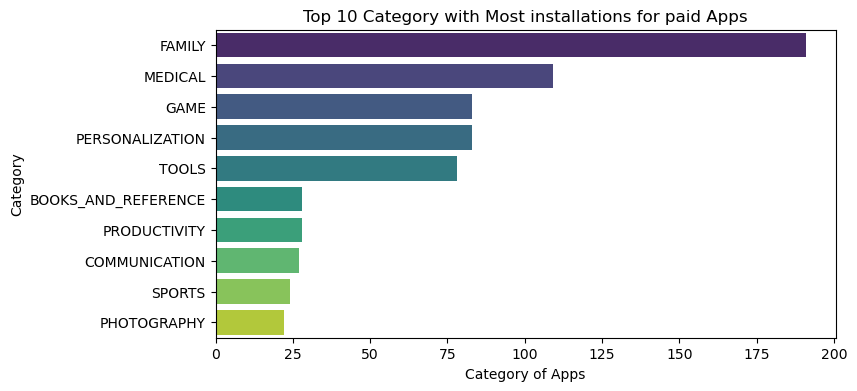

In [45]:
# Ploting a Bar Plot
plt.figure(figsize=(8,4))
sns.barplot(x= 'count', y='Category' , data= paid_apps_installs, palette='viridis')
plt.title('Top 10 Category with Most installations for paid Apps')
plt.xlabel('Category of Apps')
plt.show()

In [28]:
# 2. Which category of apps has more installations for Free Apps.

free_apps = apps_data[apps_data['Type'] == 'Free']
free_apps_installs = free_apps.groupby('Category')['Type'].value_counts().sort_values(ascending=False).reset_index(name='count').head(10)
free_apps_installs

,Category,Type,count
0,FAMILY,Free,1780
1,GAME,Free,1061
2,TOOLS,Free,765
3,BUSINESS,Free,446
4,PRODUCTIVITY,Free,396
5,LIFESTYLE,Free,363
6,SPORTS,Free,360
7,COMMUNICATION,Free,360
8,MEDICAL,Free,354
9,FINANCE,Free,349


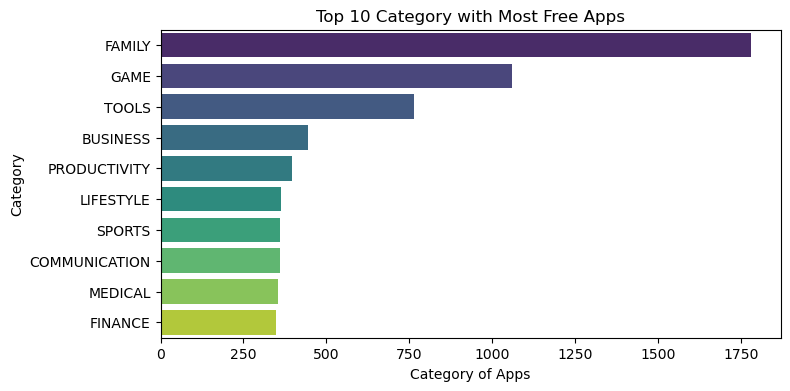

In [29]:
# Ploting a Bar Plot
plt.figure(figsize=(8,4))
sns.barplot(x= 'count', y='Category' , data= free_apps_installs, palette='viridis')
plt.title('Top 10 Category with Most Free Apps')
plt.xlabel('Category of Apps')
plt.show()

### 3. Does App Size Effects the Number of Installations.

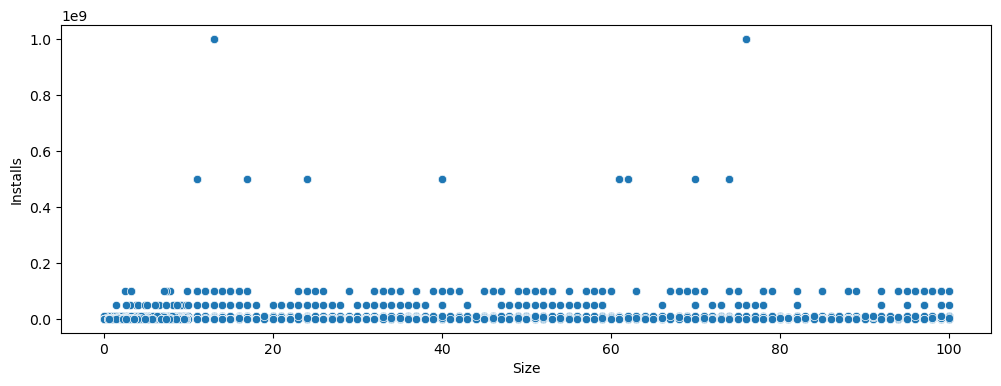

In [30]:
# 3. Does app size effects the number of installations.
plt.figure(figsize=(12,4))
sns.scatterplot(x= 'Size', y='Installs', data=apps_data, palette='viridis')
plt.show()

In [48]:
# Corelation between App Size and App Instalations

correlation = apps_data['Size'].corr(apps_data['Installs'])
print(f'Corelation Coefficent is {round(correlation, 3)}')
print('Weak corelation between Size of the apps and numbe for installs')

Corelation Coefficent is 0.165
Weak corelation between Size of the apps and numbe for installs


### 4. What is Average Size of most Installed Apps in each Category

In [32]:
# 4. What is average size of most installed apps in each category

category_size = apps_data[['Category', 'Installs', 'Size']]
avg_size_in_category = category_size.groupby('Category')['Size'].mean().sort_values(ascending=False).head(10)
avg_size_in_category

Category
GAME                  44.370059
FAMILY                28.319017
TRAVEL_AND_LOCAL      24.654479
SPORTS                24.338810
HEALTH_AND_FITNESS    22.768826
PARENTING             22.512963
FOOD_AND_DRINK        22.185000
ENTERTAINMENT         21.853333
EDUCATION             20.790541
AUTO_AND_VEHICLES     20.036800
Name: Size, dtype: float64

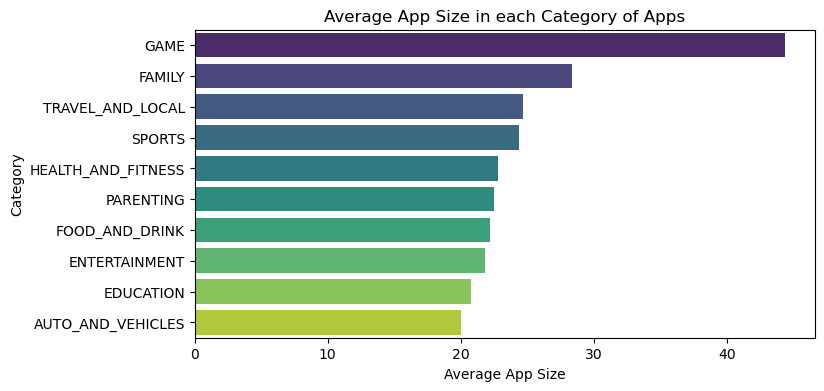

In [33]:
# Ploting a Bar Plot
plt.figure(figsize=(8,4))
sns.barplot(x=avg_size_in_category.values, y=avg_size_in_category.index, palette='viridis')
plt.title('Average App Size in each Category of Apps')
plt.xlabel('Average App Size')
plt.show()

### 5. Checking Category with high Installations but less Reviews

In [34]:
# 5. Checking category with high installations but less reviews

# 1. Creating Install to Review Ratio
apps_data['IR ratio'] = apps_data['Installs'] / apps_data['Reviews']
category_reviews = apps_data[['Category','Reviews', 'Installs','IR ratio']]

# 2. Filtering Data

category_reviews_filtered = category_reviews[category_reviews['IR ratio'] != float('inf')]

# 3. Grouping Data by Category

for_plot = category_reviews_filtered.groupby('Category')[['IR ratio']].mean().sort_values(by= 'IR ratio',ascending=False).reset_index().head(10)
for_plot

,Category,IR ratio
0,TOOLS,1604.343922
1,BOOKS_AND_REFERENCE,240.332736
2,PARENTING,205.376263
3,ART_AND_DESIGN,200.165051
4,BEAUTY,181.391855
5,VIDEO_PLAYERS,170.848568
6,LIBRARIES_AND_DEMO,160.047659
7,PRODUCTIVITY,154.566506
8,TRAVEL_AND_LOCAL,147.046998
9,AUTO_AND_VEHICLES,145.243360


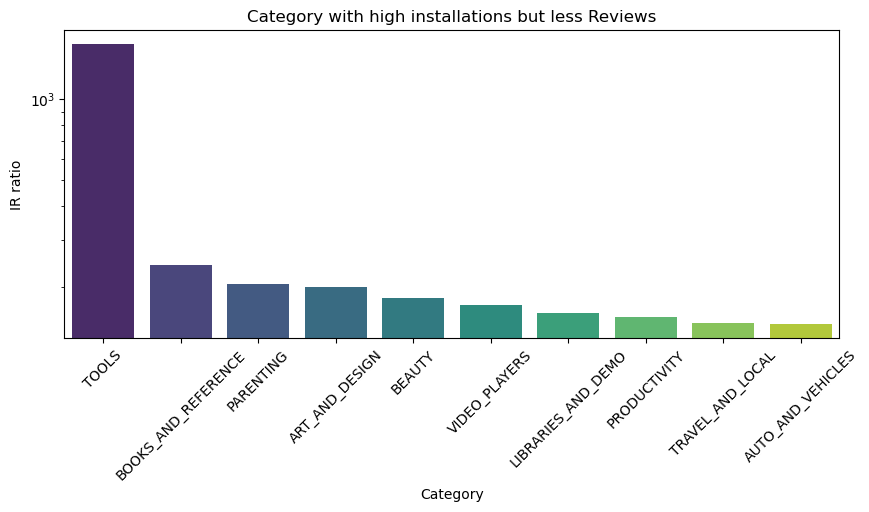

In [35]:
# Ploting

plt.figure(figsize=(10,4))
sns.barplot(x='Category', y='IR ratio', data= for_plot, palette='viridis')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Category with high installations but less Reviews')
plt.show()

### 6. Does Size has any Realtionship with Reviews.

In [36]:
# 6. Does size has any realtionship with reviews.

size_reviews = apps_data[['Size', 'Reviews']].groupby('Size')[['Reviews']].sum().sort_values(by= 'Reviews', ascending=False).reset_index()

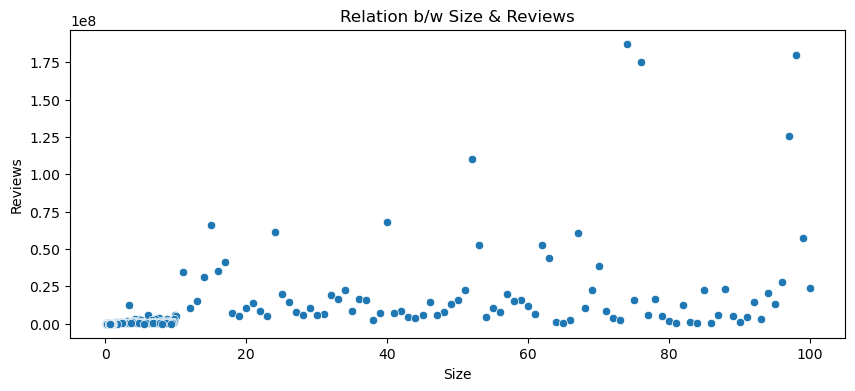

In [37]:
# Ploating a scatter plot

plt.figure(figsize=(10,4))
sns.scatterplot(x='Size', y='Reviews', data= size_reviews)
plt.title('Relation b/w Size & Reviews')
plt.show()

In [46]:
# Finding corealtion b/w Size of apps & App Reviews

co_relation = size_reviews['Size'].corr(size_reviews['Reviews'])
print(f'Corelation Coefficent is {round(co_relation, 3)}')
print('Moderate Corelation between Size of the apps and number of reviews')

Corelation Coefficent is 0.467
Moderate Corelation between Size of the apps and number of reviews


### 6. Which Category got more Installations but Least Amount of Published Apps.

In [39]:
# Calculating Installations and Published Apps

install_published = pd.DataFrame({'Total Installs':apps_data.groupby('Category')['Installs'].sum(), 'Published Apps': apps_data['Category'].value_counts()})

# Calculating Installation to Published Ratio

install_published['IP ratio'] = install_published['Total Installs'] / install_published['Published Apps']


In [40]:
max_installs = install_published['IP ratio'].idxmax()
max_apps = install_published['IP ratio'].idxmin()
print(f'Apps with More instalations & Less published apps is {max_installs}')
print(f'Apps with Less instalations & More published apps is {max_apps}')

Apps with More instalations & Less published apps is COMMUNICATION
Apps with Less instalations & More published apps is MEDICAL


In [41]:
for_plot2 = install_published.sort_values(by='IP ratio',ascending=False).head(10)
for_plot2

,Total Installs,Published Apps,IP ratio
COMMUNICATION,32647276251,387,8.435989e+07
SOCIAL,14069867902,295,4.769447e+07
VIDEO_PLAYERS,6222002720,175,3.555430e+07
PRODUCTIVITY,14176091369,424,3.343418e+07
GAME,35086024415,1144,3.066960e+07
PHOTOGRAPHY,10088247655,335,3.011417e+07
TRAVEL_AND_LOCAL,6868887146,258,2.662359e+07
NEWS_AND_MAGAZINES,7496317760,283,2.648876e+07
ENTERTAINMENT,2869160000,149,1.925611e+07
TOOLS,11452771915,843,1.358573e+07


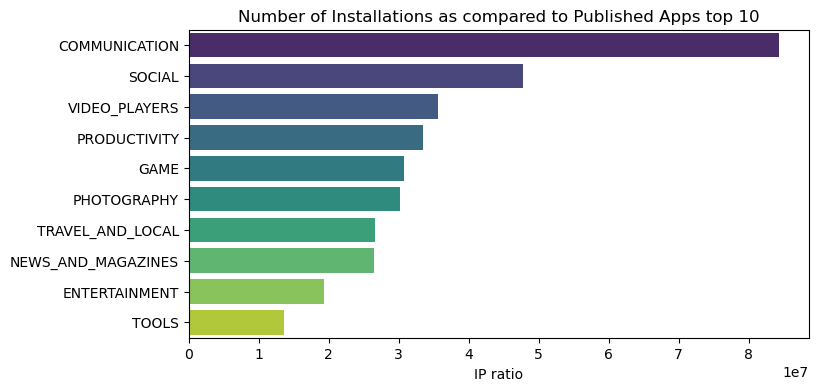

In [42]:
# Ploting

plt.figure(figsize=(8,4))
sns.barplot(x='IP ratio', y=for_plot2.index,data=for_plot2, palette='viridis')
plt.title('Number of Installations as compared to Published Apps top 10')
plt.show()

In [43]:
for_plot3 = install_published.sort_values(by='IP ratio', ascending=True).head(10)
for_plot3

,Total Installs,Published Apps,IP ratio
MEDICAL,53257437,463,1.150269e+05
EVENTS,15973161,64,2.495806e+05
BEAUTY,27197050,53,5.131519e+05
PARENTING,31521110,60,5.253518e+05
AUTO_AND_VEHICLES,53130211,85,6.250613e+05
LIBRARIES_AND_DEMO,62995910,85,7.411284e+05
COMICS,56086150,60,9.347692e+05
DATING,264310807,234,1.129533e+06
LIFESTYLE,537643539,382,1.407444e+06
ART_AND_DESIGN,124338100,65,1.912894e+06


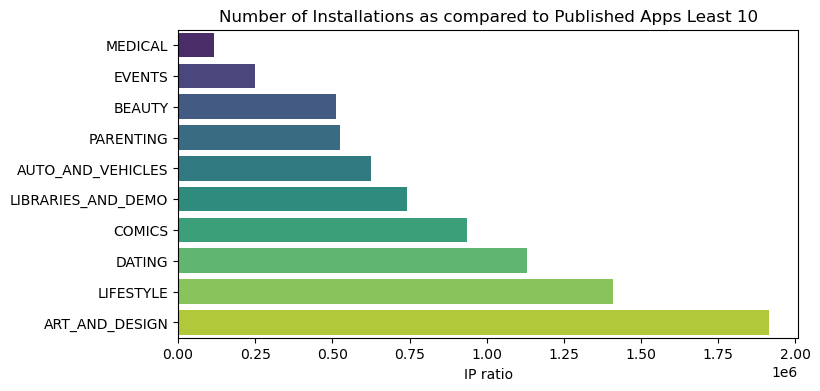

In [44]:
# Ploting

plt.figure(figsize=(8,4))
sns.barplot(x='IP ratio', y=for_plot3.index,data=for_plot3, palette='viridis')
plt.title('Number of Installations as compared to Published Apps Least 10')
plt.show()

## 5. Interpreting the results

### Insights

- The dataset showcases a significantly higher count of free apps compared to paid ones.

- Family, Games, Tools, Medical, and Business emerge as the categories garnering the highest installations, showcasing their popularity among users.

- Notably, the Tools category ranks 5th in paid installations but holds the 3rd position in free installations, highlighting its widespread appeal across pricing models. However, despite high installations, it registers comparatively fewer reviews, suggesting potential user dissatisfaction or a need for enhanced user engagement strategies.

- Tools Category Analysis: Moreover, the Tools category ranks among the top 10 in terms of installations while having fewer published apps.